In [1]:
import tensorflow as tf

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
(train_image,train_label),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
train_image.shape

(60000, 28, 28)

In [5]:
train_label.shape

(60000,)

In [6]:
test_image.shape

(10000, 28, 28)

In [7]:
test_label.shape

(10000,)

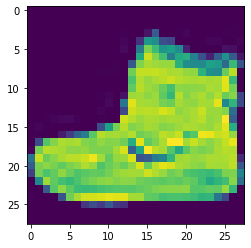

In [8]:
plt.imshow(train_image[0])

In [9]:
print(train_image[0].min(),train_image[0].max())

0 255


In [10]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
train_image=train_image/255
test_image=test_image/255

In [12]:
model = tf.keras.Sequential()

In [13]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28*28 vector
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #label isn't one-hot code
              metrics=['acc']
)

In [16]:
model.fit(train_image,train_label,epochs=5) #1875*32=60000，every epoch has 1875 batches ,and every batches has 32 figures.

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4933 - acc: 0.8265
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3728 - acc: 0.8644
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3368 - acc: 0.8767
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3115 - acc: 0.8856
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2900 - acc: 0.8942


In [17]:
model.evaluate(test_image,test_label)

313/313 [==============================] - 0s 894us/step - loss: 0.3621 - acc: 0.8689


[0.36213919520378113, 0.8689000010490417]